<h1>SVM multiclass classification of Human activity recognition with smartphone dataset</h1>

<h2>Importing libraties and dataset</h2>

In [14]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

import os
print(os.listdir("/kaggle/input/human-activity-recognition-with-smartphones"))


['train.csv', 'test.csv']


<h2>Load and train sets</h2>

In [15]:
train = shuffle(pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/train.csv"))
test = shuffle(pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/test.csv"))

<h2>Checking dataset information</h2>

In [16]:
print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



<h2>Frequency distribution of outcomes</h2>

In [17]:
train_outcome = pd.crosstab(index=train["Activity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


We can tell that most of the people use their mobile while laying down

<h2>Visualizing outcome distribution of the set</h2>

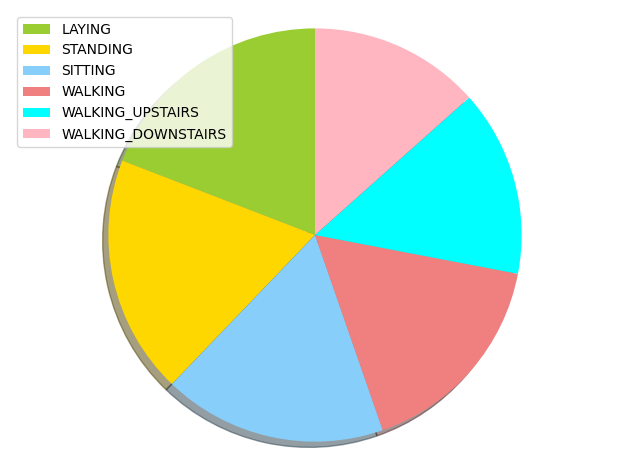

In [18]:
temp = train["Activity"].value_counts()
df =pd.DataFrame({'labels': temp.index,
                'values': temp.values
                 })

labels= df['labels']
sizes=df['values']
colors=['yellowgreen','gold','lightskyblue','lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors= colors, shadow= True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches,labels,loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

We can see the frequency distribution in the form of a pie chart, the chart might look symetric but it is not.

<h2>Normalize the predictor</h2>

In [26]:
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)

print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

names_of_predictors = list(X_train.columns.values)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Number of numeric features: 561


<h2>Hyperparameter tuning using grid search and cross validation</h2>

In [27]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

<h2>Training SVM model using radical kernal</h2>

In [28]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

<h2>Confusion matrix and accuracy score</h2>

In [30]:
print('Best score for training data:', svm_model.best_score_,"\n") 

print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9869416427345922 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 

